## pandas from the ground up

### https://www.youtube.com/watch?v=5JnMutdy6Fw&t=47s  

### Exercises-3

In [1]:
data_folder = "C:/Users/Admin/Dropbox/Python/Jupyter Notebook files/Exercises_pandasfromthegroundup/"

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
titles = pd.read_csv(data_folder + "titles.csv", index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [4]:
cast = pd.read_csv(data_folder + "cast.csv", index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

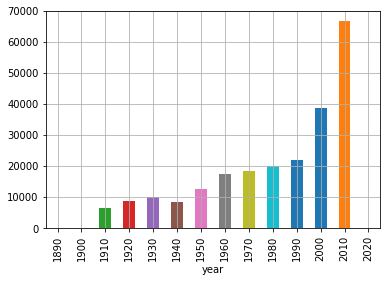

In [5]:
titles.groupby(titles.year // 10 * 10).size().plot(kind='bar', grid=True)

### Use groupby() to plot the number of "Hamlet" films made each decade.

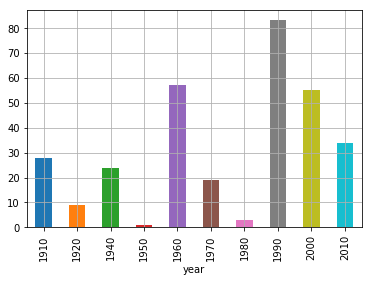

In [6]:
cast[cast.title == "Hamlet"].groupby(cast.year // 10 * 10).size().plot(kind='bar', grid=True)

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [7]:
cast[(cast.n == 1) & (cast.year >= 1950) & (cast.year <= 1959)].groupby(['year', 'type']).size()

year  type   
1950  actor      621
      actress    279
1951  actor      647
      actress    279
1952  actor      606
      actress    291
1953  actor      652
      actress    300
1954  actor      634
      actress    308
1955  actor      639
      actress    281
1956  actor      642
      actress    304
1957  actor      734
      actress    301
1958  actor      704
      actress    293
1959  actor      720
      actress    317
dtype: int64

In [8]:
#ex extra
cast[(cast.n == 1) & (cast.year >= 1950) & (cast.year <= 1959)].groupby('type').size()

type
actor      6599
actress    2953
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [9]:
cast[(cast.year // 10 * 10 == 1950) & (cast.n < 6)].groupby(['n', 'type']).size()

n    type   
1.0  actor      6599
     actress    2953
2.0  actor      4550
     actress    4544
3.0  actor      5575
     actress    3136
4.0  actor      5581
     actress    2838
5.0  actor      5597
     actress    2540
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [10]:
cast[cast.title == "The Pink Panther"].sort_values('n').dropna().groupby('year').size()

year
1963    15
2006    51
dtype: int64

In [11]:
cast[cast.title == "The Pink Panther"].sort_values('n').groupby('year')[['n']].max()

,n
year,
1963,15.0
2006,50.0


### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [12]:
ggg = cast[cast.name == "Frank Oz"].groupby(['year', 'title']).size()
ggg[ggg > 1]

year  title                               
1979  The Muppet Movie                        8
1981  An American Werewolf in London          2
      The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [13]:
ggg2 = cast[cast.name == "Frank Oz"].groupby('character').size()
ggg2[ggg2 >= 2]

character
Animal            6
Bert              3
Cookie Monster    3
Fozzie Bear       4
Grover            2
Miss Piggy        6
Sam the Eagle     5
Yoda              6
dtype: int64